# Mushroom Classification

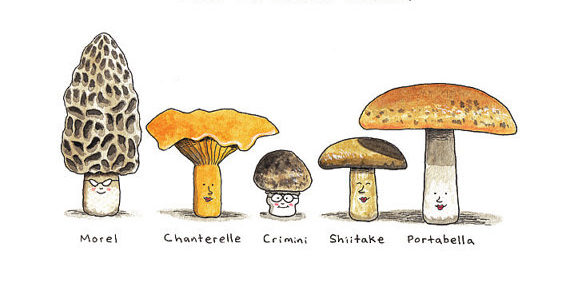

## Business Problem
The objective of this challenge is to build a model learned using different characteristics of mushrooms that will automatically determine whether a mushroom is edible or poisonous.

## Need of Machine Learning for this problem
This dataset includes descriptions of hypothetical samples corresponding to 23 species of gilled mushrooms in the Agaricus and Lepiota Family Mushroom drawn from The Audubon Society Field Guide to North American Mushrooms (1981).

The Guide clearly states that there is no simple rule for determining the edibility of a mushroom; no rule like "leaflets three, let it be" for Poisonous Oak and Ivy.

Hence, we will use machine learning techniques to find a way to classify the mushrooms accuractely.

## Target Variable
Class: Edible = e, Poisonous = p

## Features
<ol>
<li>Cap-shape: bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s

<li>Cap-surface: fibrous=f,grooves=g,scaly=y,smooth=s

<li>Cap-color: brown=n,buff=b,cinnamon=c,gray=g,green=r,pink=p,purple=u,red=e,white=w,yellow=y

<li>Bruises: bruises=t,no=f

<li>Odor: almond=a,anise=l,creosote=c,fishy=y,foul=f,musty=m,none=n,pungent=p,spicy=s

<li>Gill-attachment: attached=a,descending=d,free=f,notched=n

<li>Gill-spacing: close=c,crowded=w,distant=d

<li>Gill-size: broad=b,narrow=n

<li>Gill-color: black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e,white=w,yellow=y

<li>Stalk-shape: enlarging=e,tapering=t

<li>Stalk-root: bulbous=b,club=c,cup=u,equal=e,rhizomorphs=z,rooted=r,missing=?

<li>Stalk-surface-above-ring: fibrous=f,scaly=y,silky=k,smooth=s

<li>Stalk-surface-below-ring: fibrous=f,scaly=y,silky=k,smooth=s

<li>Stalk-color-above-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y

<li>Stalk-color-below-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y

<li>Veil-type: partial=p,universal=u

<li>Veil-color: brown=n,orange=o,white=w,yellow=y

<li>Ring-number: none=n,one=o,two=t

<li>Ring-type: cobwebby=c,evanescent=e,flaring=f,large=l,none=n,pendant=p,sheathing=s,zone=z

<li>Spore-print-color: black=k,brown=n,buff=b,chocolate=h,green=r,orange=o,purple=u,white=w,yellow=y

<li>Population: abundant=a,clustered=c,numerous=n,scattered=s,several=v,solitary=y

<li>Habitat: grasses=g,leaves=l,meadows=m,paths=p,urban=u,waste=w,woods=d
</ol>

### Scoring Metric

We will choose f1 score as the performance metric for model evaluation. 

<b>Reason:</b> Since it is the classification problem and we want false positive as less as possible i.e. poisonous mushrooms should not be classified as edible as that can create serious health issues.

### Loading the required packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_curve
from pandas.plotting import scatter_matrix
from sklearn.svm import SVC, LinearSVC

import warnings
warnings.filterwarnings("ignore")

### Loading the data

In [2]:
df = pd.read_csv('mushrooms.csv')

This mushroom dataset found on Kaggle comes from the UCI Machine Learning content and has been around for about thirty years. As I load the data into a pandas dataframe using Python, I notice that all the features are categorical. Even the target column, <b>class</b> uses either the string ‘p’ for poisonous or ‘e’ for edible.

### Data Inspection

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
class                       8124 non-null object
cap-shape                   8124 non-null object
cap-surface                 8124 non-null object
cap-color                   8124 non-null object
bruises                     8124 non-null object
odor                        8124 non-null object
gill-attachment             8124 non-null object
gill-spacing                8124 non-null object
gill-size                   8124 non-null object
gill-color                  8124 non-null object
stalk-shape                 8124 non-null object
stalk-root                  8124 non-null object
stalk-surface-above-ring    8124 non-null object
stalk-surface-below-ring    8124 non-null object
stalk-color-above-ring      8124 non-null object
stalk-color-below-ring      8124 non-null object
veil-type                   8124 non-null object
veil-color                  8124 non-null object
ring-number

The dataset contains 8124 datapoints and 23 features. All the features are categorical.

In [4]:
df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


We can observe that the target variable has 2 unique values. Its a binary classification problem.

In [5]:
#Checking for duplicate rows
df.duplicated().sum()

0

There are no duplicate rows in the dataset

In [6]:
#Checking number of different categories present in each categorical feature
df.nunique()

class                        2
cap-shape                    6
cap-surface                  4
cap-color                   10
bruises                      2
odor                         9
gill-attachment              2
gill-spacing                 2
gill-size                    2
gill-color                  12
stalk-shape                  2
stalk-root                   5
stalk-surface-above-ring     4
stalk-surface-below-ring     4
stalk-color-above-ring       9
stalk-color-below-ring       9
veil-type                    1
veil-color                   4
ring-number                  3
ring-type                    5
spore-print-color            9
population                   6
habitat                      7
dtype: int64

Here all the columns are categorical and we consider class as the response variable.

The categories have relatively lesser cardinality. The 'veil-type' feature have only cardinality=1 which make this feature useless for us. Hence, we will remove this feature.

In [7]:
#Removing 'veil-type feature
df = df.drop('veil-type', axis = 1)

In [8]:
#Checking for missing values
df.isna().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

### Assigning X - features, y - target 

In [9]:
X = df.drop('class', axis = 1)
y = df['class']

There are no missing values in the dataset but to fulfill the Project requirement we are introducing the missing values explicitly.

### Include missing values explicitly

In [10]:
# replace about 10 percent of the data with np.nan
for i in range((int)(X.size * 0.1)):
    row_index = np.random.randint(X.shape[0])
    col_index = np.random.randint(X.shape[1])
    col = X.columns[col_index]
    X.iloc[row_index][col] = np.nan

# Test what percentage of data is missing
val = 0
for col in X.columns:
    val += X[col].count()

print("Percentage of missing values in dataset: ", 100 - val * 100 / X.size)

Percentage of missing values in dataset:  9.506224941970885


In [11]:
#Again Checking for missing values
X.isna().sum()

cap-shape                   754
cap-surface                 758
cap-color                   786
bruises                     761
odor                        738
gill-attachment             787
gill-spacing                782
gill-size                   768
gill-color                  772
stalk-shape                 816
stalk-root                  764
stalk-surface-above-ring    794
stalk-surface-below-ring    756
stalk-color-above-ring      744
stalk-color-below-ring      746
veil-color                  762
ring-number                 751
ring-type                   845
spore-print-color           773
population                  755
habitat                     806
dtype: int64

We have added around 10% random missing values in each column of the dataset

In [12]:
X.head(4)

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,x,s,n,t,p,f,c,n,k,e,...,s,s,w,w,w,o,p,k,NaN,u
1,x,s,y,t,NaN,f,c,b,k,e,...,NaN,s,NaN,w,w,NaN,p,n,n,g
2,b,s,w,t,l,f,c,b,n,e,...,s,s,w,NaN,w,o,p,n,n,m
3,x,y,w,t,p,f,c,n,n,e,...,s,s,w,w,w,o,p,NaN,s,u


#### Checking for imbalanced data

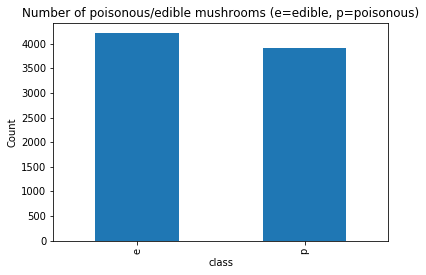

In [13]:
plt.figure()
pd.Series(df['class']).value_counts().sort_index().plot(kind = 'bar')
plt.ylabel("Count")
plt.xlabel("class")
plt.title('Number of poisonous/edible mushrooms (e=edible, p=poisonous)');

In [14]:
df['class'].value_counts()

e    4208
p    3916
Name: class, dtype: int64

Our dataset is entirely comprised of categorical values, each with a relatively low cardinality. It is slightly imbalanced, having 4208 (51.8%) entries marked as edible and 3916 (48.2%) marked poisonous, the dataset is slightly imbalanced with ~5:3 ratio. This slight imbalance should not have significant impact on our model performance.

### Train-Test Split in the ratio 80:20

Before diving deep into modelling and making predictions, we need to split our data set into a training set and test set. That way, we can train an algorithm on the training set, and make predictions on the test set. The error metrics will be much more relevant this way, since the algorithm will make predictions on data it has not seen before.

In [15]:
from sklearn.model_selection import train_test_split

#Taking 20% data as test data
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size = 0.2, random_state = 25)

### Imputation of missing values

In [16]:
#We will only fit imputer on train data and directly transform test data to prevent data leakage
from sklearn.impute import SimpleImputer

imp_mean = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
X_train = pd.DataFrame(imp_mean.fit_transform(X_train), columns = X_train.columns)
X_test = pd.DataFrame(imp_mean.transform(X_test), columns = X_test.columns)

Using "SimpleImputer" for computing the missing values using most frequent value of each column in which missing value is located in both train and test data.

In [17]:
X_train.isna().sum()

cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [18]:
X_test.isna().sum()

cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

Since the data is categorical, there is no need to perform scaling.

### Encoding Techniques

Now that we are familiar with the data, it is time to get it ready for modelling. As mentioned before, the features have letters to represent the different possible values, but we need to turn them into numbers.
To achieve that, we will use label encoding, frequency and one-hot encoding.


In [19]:
#Mapping values in target variable
y_train = y_train.map({'p':1, 'e':0}).astype(int)
y_test = y_test.map({'p':1, 'e':0}).astype(int)

Mapping the values of target variable, poisonous to 1 and edible to 0.

### Label Encoding

Label encoding will turn a categorical feature into numerical. However, it is not recommended to use label encoding when there are more than two possible values.

Because it will then assign each value to either 0, 1 or 2. This is a problem, because the “2” could be considered as being more important and false correlations could be drawn from that.

In [20]:
labelencoder=LabelEncoder()
X_train_label = pd.DataFrame()
for column in X_train.columns:
    X_train_label[column] = labelencoder.fit_transform(X_train[column])
X_test_label = labelencoder.transform(X_test[column])

### Frequency Encoding

In [21]:
def freq_enc(X):
    #Frequency Encoding
    X_freq_enc = pd.DataFrame()
    for column in X.columns:
        #X[column] = X[column].replace(np.nan, 999) #Replacing NAN values with 999 to convert them into float
        X_freq = (X.groupby(column).size()) / len(X)
        freq_enc = X[column].apply(lambda x : X_freq[x])
        X_freq_enc[f"{column}_encoded"] = freq_enc
    return X_freq_enc

Here frequncy encoding is used. It is a way to utilize the frequency of the categories as labels. In the cases where the frequency is related somewhat with the target variable, it helps the model to understand and assign the weight in direct and inverse proportion, depending on the nature of the data.

In [22]:
X_train_freq_enc = freq_enc(X_train)
X_test_freq_enc = freq_enc(X_test)

In [23]:
X_train_freq_enc.head()

,cap-shape_encoded,cap-surface_encoded,cap-color_encoded,bruises_encoded,odor_encoded,gill-attachment_encoded,gill-spacing_encoded,gill-size_encoded,gill-color_encoded,stalk-shape_encoded,...,stalk-surface-above-ring_encoded,stalk-surface-below-ring_encoded,stalk-color-above-ring_encoded,stalk-color-below-ring_encoded,veil-color_encoded,ring-number_encoded,ring-type_encoded,spore-print-color_encoded,population_encoded,habitat_encoded
0,0.501154,0.259886,0.205878,0.623481,0.021850,0.97692,0.852593,0.283428,0.165718,0.388829,...,0.674258,0.647330,0.591168,0.579320,0.977381,0.926912,0.541160,0.211879,0.543007,0.451454
1,0.501154,0.286813,0.352362,0.623481,0.243422,0.97692,0.852593,0.283428,0.287121,0.611171,...,0.674258,0.647330,0.591168,0.579320,0.977381,0.926912,0.308509,0.363594,0.543007,0.451454
2,0.501154,0.452839,0.114325,0.376519,0.043853,0.97692,0.852593,0.716572,0.136790,0.388829,...,0.674258,0.647330,0.591168,0.579320,0.977381,0.926912,0.541160,0.212956,0.139560,0.236190
3,0.501154,0.259886,0.114325,0.623481,0.485921,0.97692,0.852593,0.716572,0.165718,0.388829,...,0.261117,0.254962,0.050469,0.056009,0.977381,0.926912,0.141253,0.363594,0.543007,0.122327
4,0.501154,0.286813,0.117864,0.376519,0.243422,0.97692,0.852593,0.716572,0.165718,0.611171,...,0.674258,0.066933,0.591168,0.579320,0.977381,0.926912,0.541160,0.181720,0.139560,0.039545


### One Hot Encoding

If we one-hot encode the feature say, cap-shape, we should get:
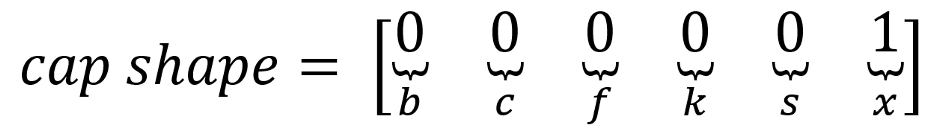

As you can see, the cap shape is now a vector. A 1 denotes the actual cap shape value for an entry in the data set, and the rest is filled with 0. Again, you can think of 1 as true and 0 as false. It will do the same for all the columns.
The drawback of one-hot encoding is that it introduces more columns to the data set.  In the case of cap shape, we go from one column to six columns. For very large data sets, this might be a problem, but in our case, the additional columns should be manageable.

In [24]:
#OneHot Encoding

from sklearn.preprocessing import OneHotEncoder

OneHotEncoder = OneHotEncoder(drop= 'first')
X_train_one_enc = OneHotEncoder.fit_transform(X_train)
X_test_one_enc = OneHotEncoder.transform(X_test)

Here we do one hot encoding. We map each category to a vector that contains 1 and 0 denoting the presence of the feature or not. The number of vectors depends on the categories which we want to keep.

In [25]:
X_train_one_enc.shape, X_test_one_enc.shape

((6499, 95), (1625, 95))

## Exploratory Data Analysis

### Data Visualization

Now, I want to see how each feature affects the target. To do so, for each feature, I made a count plot of all possible values separated by the class of mushroom to check distribution of each feature on the basis of target variable. The <i>hue</i> will give a color code to the poisonous and edible class.

[Text(0, 0.5, 'Probability')]

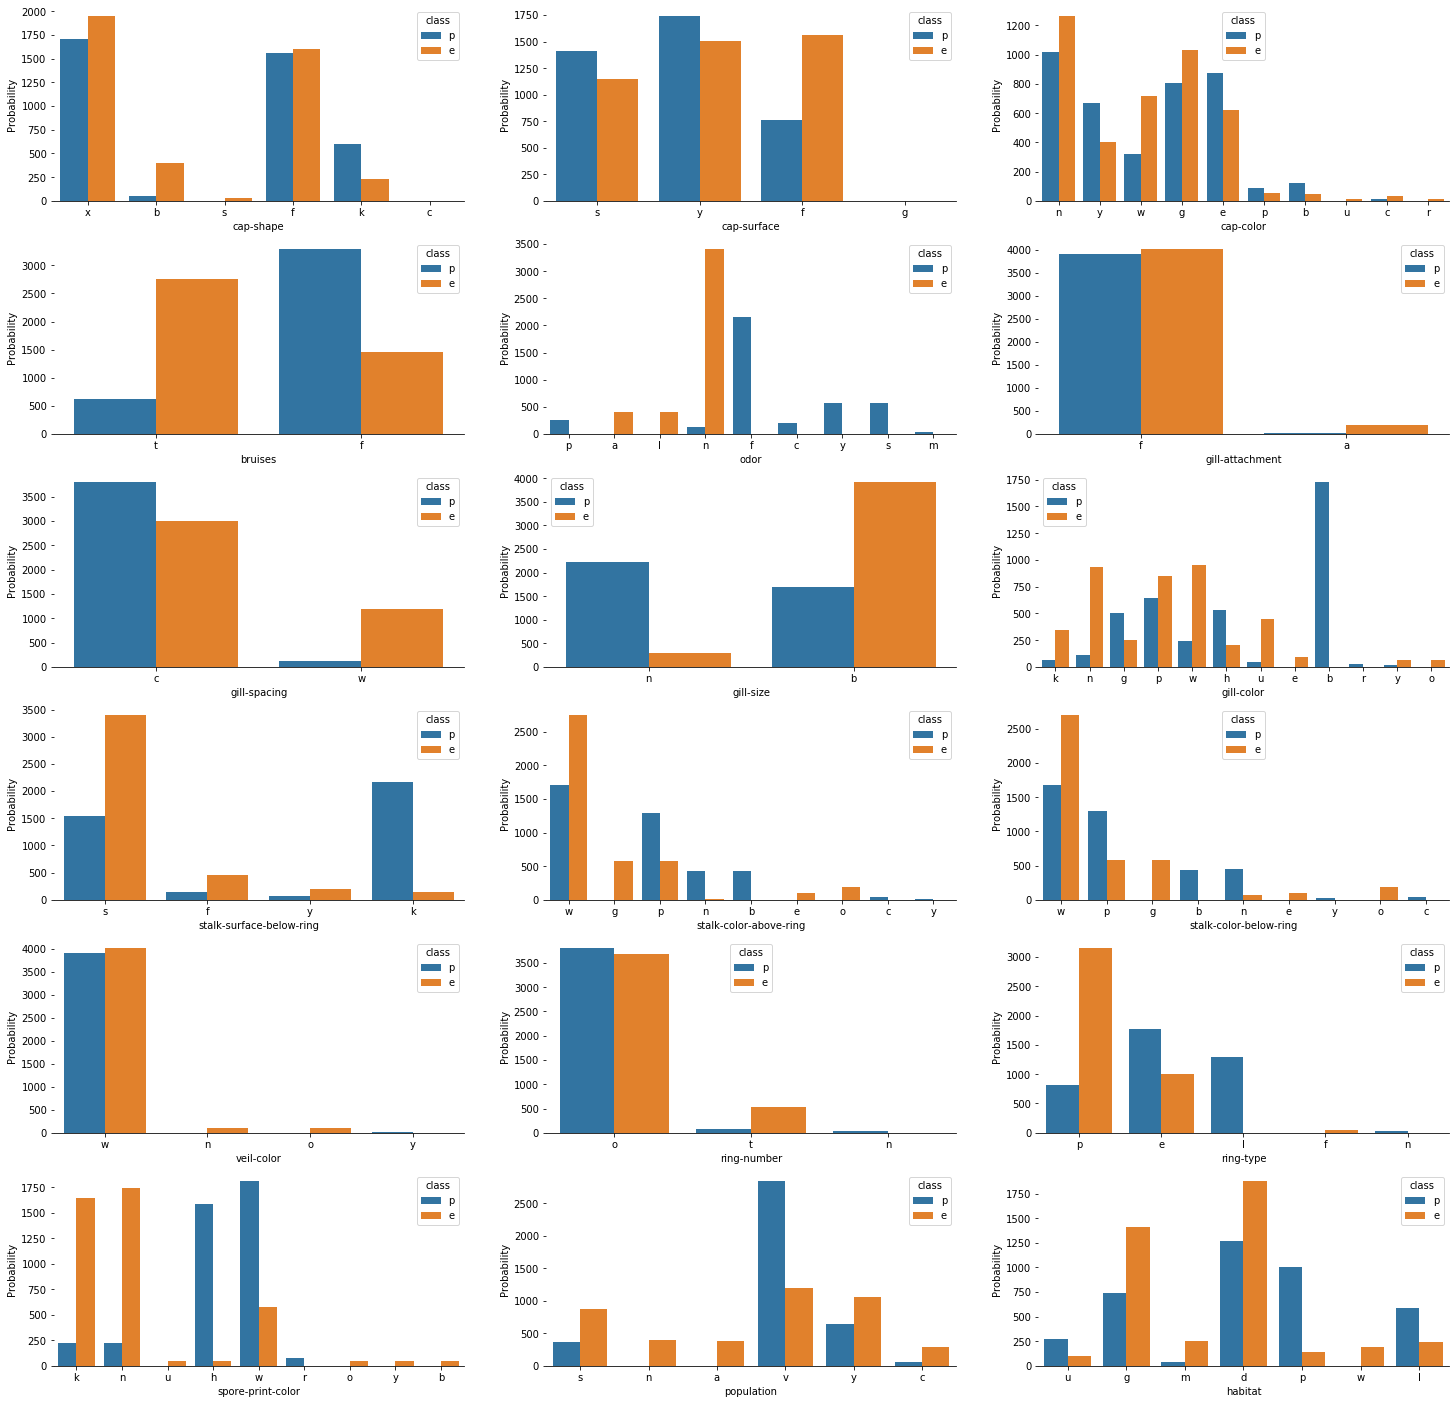

In [26]:
# Set up the matplotlib figure
f, axes = plt.subplots(6,3, figsize=(25, 25))
sns.despine(left=True)

#Checking distribution of categories in each feature using countplot
ax = sns.countplot(df['cap-shape'], hue =df['class'], ax=axes[0, 0])
ax.set(ylabel='Probability')
ax = sns.countplot(df['cap-surface'], hue =df['class'], ax=axes[0, 1])
ax.set(ylabel='Probability')
ax = sns.countplot(df['cap-color'], hue =df['class'], ax=axes[0, 2])
ax.set(ylabel='Probability')
ax = sns.countplot(df['bruises'], hue =df['class'], ax=axes[1, 0])
ax.set(ylabel='Probability')
ax = sns.countplot(df['odor'],hue =df['class'],  ax=axes[1, 1])
ax.set(ylabel='Probability')
ax = sns.countplot(df['gill-attachment'], hue =df['class'], ax=axes[1, 2])
ax.set(ylabel='Probability')
ax = sns.countplot(df['gill-spacing'], hue =df['class'], ax=axes[2, 0])
ax.set(ylabel='Probability')
ax = sns.countplot(df['gill-size'], hue =df['class'], ax=axes[2, 1])
ax.set(ylabel='Probability')
ax = sns.countplot(df['gill-color'], hue =df['class'], ax=axes[2, 2])
ax.set(ylabel='Probability')
ax = sns.countplot(df['stalk-surface-below-ring'], hue =df['class'], ax=axes[3, 0])
ax.set(ylabel='Probability')
ax = sns.countplot(df['stalk-color-above-ring'], hue =df['class'], ax=axes[3, 1])
ax.set(ylabel='Probability')
ax = sns.countplot(df['stalk-color-below-ring'], hue =df['class'], ax=axes[3, 2])
ax.set(ylabel='Probability')
ax = sns.countplot(df['veil-color'], hue =df['class'], ax=axes[4, 0])
ax.set(ylabel='Probability')
ax = sns.countplot(df['ring-number'], hue =df['class'], ax=axes[4, 1])
ax.set(ylabel='Probability')
ax = sns.countplot(df['ring-type'], hue =df['class'], ax=axes[4, 2])
ax.set(ylabel='Probability')
ax = sns.countplot(df['spore-print-color'], hue =df['class'], ax=axes[5, 0])
ax.set(ylabel='Probability')
ax = sns.countplot(df['population'], hue =df['class'],  ax=axes[5, 1])
ax.set(ylabel='Probability')
ax = sns.countplot(df['habitat'], hue =df['class'], ax=axes[5, 2])
ax.set(ylabel='Probability')

From the above chart we can see the univariate distribution of categories within each feature, some useful insights can be drawn from these:
- <b>Odor</b> - According to the above chart, almost all the mushrooms with no smell are edible and ones with the almond or anise smell are  also edible.
whereas, the mushrooms with bad smells like pungent, fishy or foul should not be eaten as they are poisonous.

- <b>gill-color</b> - From the chart we can infer that the mushroom with gill color b - buff and r - green are mostly poisonous and ones with e - red, o - orange and u - purple are mostly edible.

- <b>spore-print-color</b> - From the chart we infer that mostly spores which has brown or white color are danagerous for heath whereas if you see spores with orange, white, buff or purple are edible.

- <b>population</b> - Mushrooms in areas of solitary are mostly poisonous which is quite safe and mostly edible in areas with abundant population which is quite interesting to know.

- <b>habitat</b> - It's strange to know that mushrooms in the waste habitat are more edible

Let's check correlation of each feature with target variable.
### Heatmap

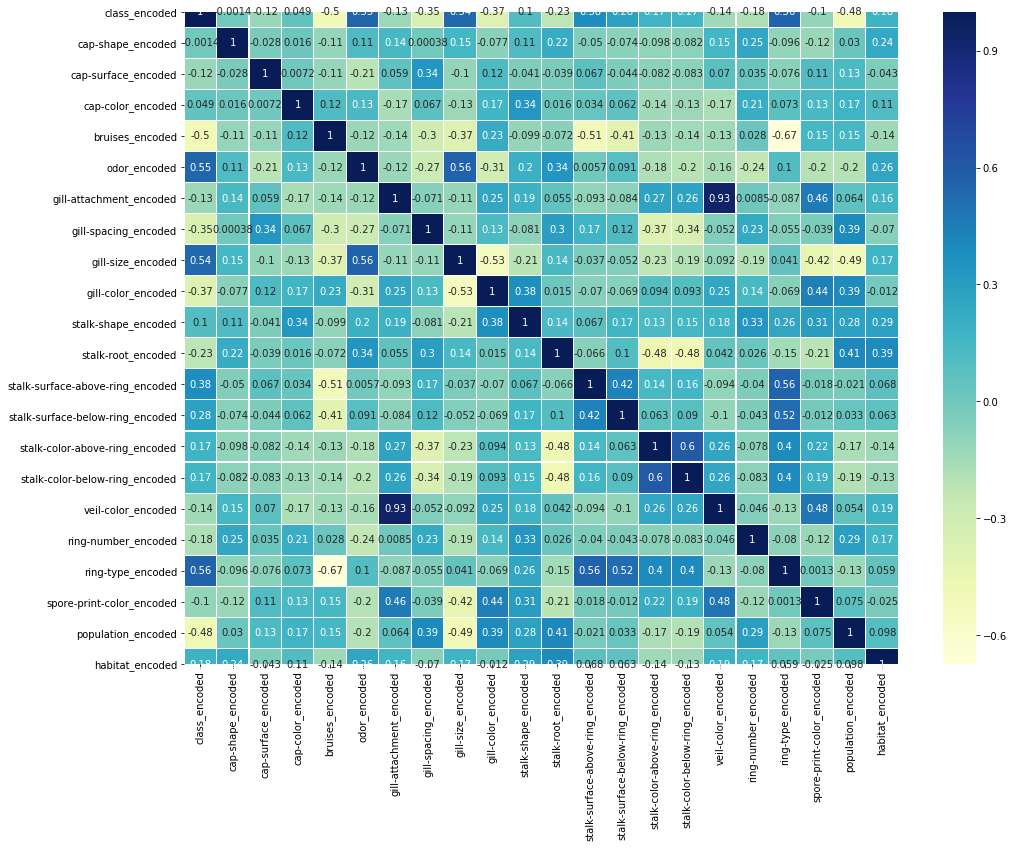

In [27]:
# Heatmap showing correlation between predictors

heatmap_df = freq_enc(df)

plt.figure(figsize=(16,12))
sns.heatmap(heatmap_df.corr(),linewidths=.1,cmap="YlGnBu", annot=True)
plt.yticks(rotation=0);

From the above heatmap we infer that the odor: 0.55, gill-size: 0.54 and ring-type: 0.56 have strong positive correlation,
Also, bruises: -0.5 and population: -0.48 have high correlation with class variable in that order.
None of the columns have 1 correlation with the target column hence we don't need to remove any column beyond this point.

## Model Evaluation

###  Logistic Regression

We will first use logistic regression. Throughout the following steps, we will use the f1 score as performance metrics. We will also display a confusion matrix and the classification reports of all the models to have a better comparision and to find the best model.

In [28]:
from sklearn.model_selection import GridSearchCV

In [29]:
param_grid = [
  {'C': [0.001, 0.01, 0.1, 1, 10, 100], 'penalty': ['l1'], 'solver': ['liblinear'], 'class_weight':['balanced', None]},
  {'C': [0.001, 0.01, 0.1, 1, 10, 100],  'penalty': ['l2'], 'solver': ['liblinear', 'lbfgs'], 'class_weight':['balanced', None]},
 ]

In [30]:
from sklearn.linear_model import LogisticRegression

#Grid-search is used to find the set of optimal hyperparameters of a model which results in the most ‘accurate’ predictions.
grid_search = GridSearchCV(LogisticRegression(), param_grid, cv=5, return_train_score=True, scoring='f1')

##### Using Frequency Encoded data

In [31]:
#Fitting the model first on frequency encoded dataset
grid_search.fit(X_train_freq_enc, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid=[{'C': [0.001, 0.01, 0.1, 1, 10, 100],
                          'class_weight': ['balanced', None], 'penalty': ['l1'],
                          'solver': ['liblinear']},
                         {'C': [0.001, 0.01, 0.1, 1, 10, 100],
                          'class_weight': ['balanced', None], 'penalty': ['l2'],
                          'solver': ['liblinear', 'lbfgs']}],
             return_train_score=True, scoring='f1')

In [32]:
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best parameters: {'C': 0.1, 'class_weight': 'balanced', 'penalty': 'l1', 'solver': 'liblinear'}
Best cross-validation score: 0.95


Accuracy: 0.948
F1 Score: 0.946

Confusion Matrix: 


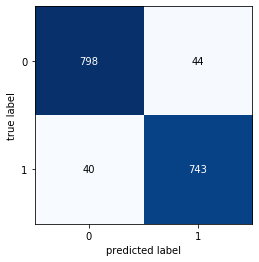

In [33]:
from sklearn.metrics import recall_score, f1_score, accuracy_score
from mlxtend.plotting import plot_confusion_matrix

pred = grid_search.predict(X_test_freq_enc)

print("Accuracy: {:.3f}".format(accuracy_score(y_test, pred)))
print("F1 Score: {:.3f}".format(f1_score(y_test, pred)))
print("\nConfusion Matrix: ")

fig, ax = plot_confusion_matrix(conf_mat=confusion_matrix(y_test, pred))
plt.show()

Now, let’s see the confusion matrix above. This will show us the true positive, true negative, false positive and false negative rates.
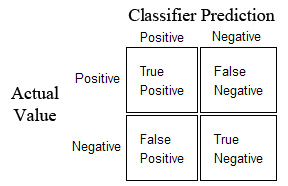
From the confusion matrix above, you see that our false positives are 40 and false negatives are 44, meaning that 40 mushroom which are poisonous are incorrectly classified as edible and 44 edible mushrooms are calssified as poisonous!

In [34]:
from sklearn.metrics import classification_report

print(classification_report(y_test, pred , target_names=["edible", "poisonous"]))

              precision    recall  f1-score   support

      edible       0.95      0.95      0.95       842
   poisonous       0.94      0.95      0.95       783

    accuracy                           0.95      1625
   macro avg       0.95      0.95      0.95      1625
weighted avg       0.95      0.95      0.95      1625



Nice results! But we need to try to reduce the False Negatives and False Positives to get better prediction.

##### Using One-Hot Encoded data

In [35]:
#Fitting the model first on one-hot encoded dataset
grid_search.fit(X_train_one_enc, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid=[{'C': [0.001, 0.01, 0.1, 1, 10, 100],
                          'class_weight': ['balanced', None], 'penalty': ['l1'],
                          'solver': ['liblinear']},
                         {'C': [0.001, 0.01, 0.1, 1, 10, 100],
                          'class_weight': ['balanced', None], 'penalty': ['l2'],
                          'solver': ['liblinear', 'lbfgs']}],
             return_train_score=True, scoring='f1')

In [36]:
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best parameters: {'C': 10, 'class_weight': None, 'penalty': 'l2', 'solver': 'liblinear'}
Best cross-validation score: 0.99


Accuracy: 0.994
F1 Score: 0.994

Confusion Matrix: 


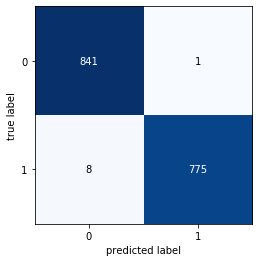

In [37]:
from sklearn.metrics import recall_score, f1_score, accuracy_score
from mlxtend.plotting import plot_confusion_matrix

pred = grid_search.predict(X_test_one_enc)

print("Accuracy: {:.3f}".format(accuracy_score(y_test, pred)))
print("F1 Score: {:.3f}".format(f1_score(y_test, pred)))
print("\nConfusion Matrix: ")

fig, ax = plot_confusion_matrix(conf_mat=confusion_matrix(y_test, pred))
plt.show()

From above confusion matrix we can see sheer improvement as only 8 poisonous mushrooms are classified as edible.

In [38]:
from sklearn.metrics import classification_report

print(classification_report(y_test, pred , target_names=["edible", "poisonous"]))

              precision    recall  f1-score   support

      edible       0.99      1.00      0.99       842
   poisonous       1.00      0.99      0.99       783

    accuracy                           0.99      1625
   macro avg       0.99      0.99      0.99      1625
weighted avg       0.99      0.99      0.99      1625



Bravo! The predictions are almost perfect now. But since the F1-Score is 1.0 here. Let's check for data leakage once just to be sure that there is no overfitting.

### Checking for Data Leakage
We observe that the results of Logistic Regression looks accurate and gives 100 % accuracy therefore there might be data leakage in the dataset.

Following checks can be performed to check for data leakage.

1. Using KNN Classifer to see if the dataset is easily seperable across the decision boundary.

In [82]:
from sklearn.neighbors import KNeighborsClassifier

from sklearn.preprocessing import StandardScaler
st = StandardScaler()
X_train_scaled = st.fit_transform(X_train_label)

knn = KNeighborsClassifier(4)
knn.fit(X_train_scaled, y_train)
print('Train score: {:.4f}'.format(knn.score(X_train_scaled, y_train)))

Train score: 0.9946


In [83]:
print(np.where(X.columns == 'gill-color'))
print(np.where(X.columns == 'odor'))

# most important parameters

(array([8], dtype=int64),)
(array([4], dtype=int64),)


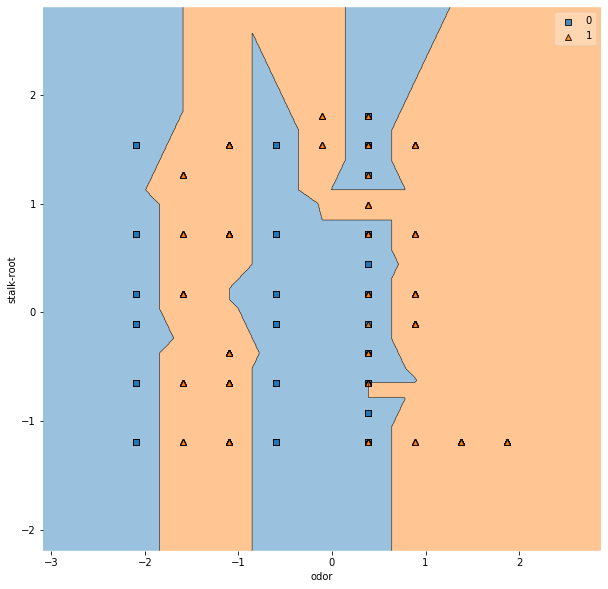

In [84]:
%matplotlib inline

from mlxtend.plotting import plot_decision_regions

fig = plt.figure(figsize=(10, 10))
plt.xlim(-0.5, 1.5)
plt.ylim(-0.5, 1.5)
X_b = np.array(X_train_scaled)[:4000,[4,8]]
y_b = y_train[:4000]

knn = KNeighborsClassifier(4)
knn.fit(X_b, y_b) 

plot_decision_regions(np.array(X_b), np.array(y_b), clf = knn)
plt.xlabel('odor')
plt.ylabel('stalk-root')
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, ["Edible", "Poisonous"])

Here we observe that data is seperabe across the decision boundary in KNN.

2. We are fitting the model only on train data and predicting the model separately on test data so no overfitting problem is observed.

3. Find the correlation of each feature column and the target column. Remove all the columns with correlation 1:- By looking at the heatmap in Data Visualization step above we find that there is no such feature which has 1 correlation with target column.

We can confirm here that there is no data leakage present. And the results we are getting above can be trusted. However, just to complete our analysis in this case study we will try to run some more models on this dataset.

We will only use Frequency Encoding and One-Hot Encoding now for further analysis.

### Kernelized Support Vector Machine (SVM)

Here we will use three kernels in Grid Search: RBF Kernel, Poly Kernel and Linear Kernel and various C and gamma parameters to perform hyper-parameter tuning and get the optimal set of hyper parameters. 

In [42]:
param_grid = [
  {'C': [0.1, 1, 10, 100], 'kernel': ['linear']},
  {'C': [0.1, 1, 10, 100], 'gamma': [0.01, 0.1, 1, 10], 'kernel': ['rbf']},
  {'C': [0.1, 1, 10, 100], 'degree': [2,3], 'kernel': ['poly']}
 ]

##### Using Frequency Encoded data

In [43]:
from sklearn.svm import SVC

grid = GridSearchCV(SVC(), param_grid, refit = True, scoring = "f1")
grid.fit(X_train_freq_enc,y_train)

GridSearchCV(estimator=SVC(),
             param_grid=[{'C': [0.1, 1, 10, 100], 'kernel': ['linear']},
                         {'C': [0.1, 1, 10, 100], 'gamma': [0.01, 0.1, 1, 10],
                          'kernel': ['rbf']},
                         {'C': [0.1, 1, 10, 100], 'degree': [2, 3],
                          'kernel': ['poly']}],
             scoring='f1')

In [44]:
print("Best parameters: {}".format(grid.best_params_))
print("Best cross-validation score: {:.2f}".format(grid.best_score_))

Best parameters: {'C': 10, 'gamma': 1, 'kernel': 'rbf'}
Best cross-validation score: 0.99


Accuracy: 0.991
F1 Score: 0.990

Confusion Matrix: 


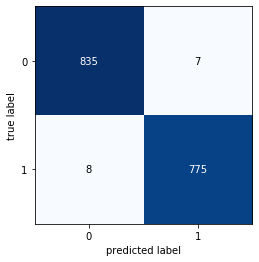

In [45]:
from sklearn.metrics import recall_score, f1_score, accuracy_score
from mlxtend.plotting import plot_confusion_matrix

pred = grid.predict(X_test_freq_enc)

print("Accuracy: {:.3f}".format(accuracy_score(y_test, pred)))
print("F1 Score: {:.3f}".format(f1_score(y_test, pred)))
print("\nConfusion Matrix: ")

fig, ax = plot_confusion_matrix(conf_mat=confusion_matrix(y_test, pred))
plt.show()

Here, the false negatives are lesser than the logistic model with the same encoding, only 8 mushrooms are poisonous but predicted as edible.

In [46]:
from sklearn.metrics import classification_report

print(classification_report(y_test, pred , target_names=["edible", "poisonous"]))

              precision    recall  f1-score   support

      edible       0.99      0.99      0.99       842
   poisonous       0.99      0.99      0.99       783

    accuracy                           0.99      1625
   macro avg       0.99      0.99      0.99      1625
weighted avg       0.99      0.99      0.99      1625



SVM also performing very well on our data. Looks like our data is too simple for these ML Models.

##### Using One Hot Encoded data

In [47]:
grid = GridSearchCV(SVC(), param_grid, refit = True, scoring = "f1")
grid.fit(X_train_one_enc,y_train)

GridSearchCV(estimator=SVC(),
             param_grid=[{'C': [0.1, 1, 10, 100], 'kernel': ['linear']},
                         {'C': [0.1, 1, 10, 100], 'gamma': [0.01, 0.1, 1, 10],
                          'kernel': ['rbf']},
                         {'C': [0.1, 1, 10, 100], 'degree': [2, 3],
                          'kernel': ['poly']}],
             scoring='f1')

In [48]:
print("Best parameters: {}".format(grid.best_params_))
print("Best cross-validation score: {:.2f}".format(grid.best_score_))

Best parameters: {'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}
Best cross-validation score: 1.00


Accuracy: 0.999
F1 Score: 0.999

Confusion Matrix: 


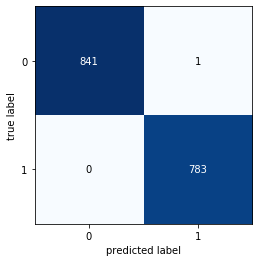

In [49]:
from sklearn.metrics import recall_score, f1_score, accuracy_score
from mlxtend.plotting import plot_confusion_matrix

pred = grid.predict(X_test_one_enc)

print("Accuracy: {:.3f}".format(accuracy_score(y_test, pred)))
print("F1 Score: {:.3f}".format(f1_score(y_test, pred)))
print("\nConfusion Matrix: ")

fig, ax = plot_confusion_matrix(conf_mat=confusion_matrix(y_test, pred))
plt.show()

In [50]:
from sklearn.metrics import classification_report

print(classification_report(y_test, pred , target_names=["edible", "poisonous"]))

              precision    recall  f1-score   support

      edible       1.00      1.00      1.00       842
   poisonous       1.00      1.00      1.00       783

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



### Decision Trees

##### Using Frequency Encoded Data

In [51]:
param_grid = {'criterion':['gini','entropy'],'max_depth': np.arange(3, 5)}

In [52]:
from sklearn.tree import DecisionTreeClassifier

grid = GridSearchCV(DecisionTreeClassifier(), param_grid, refit = True, scoring = "f1")
grid.fit(X_train_freq_enc,y_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([3, 4])},
             scoring='f1')

In [53]:
print("Best parameters: {}".format(grid.best_params_))
print("Best cross-validation score: {:.2f}".format(grid.best_score_))

Best parameters: {'criterion': 'entropy', 'max_depth': 4}
Best cross-validation score: 0.99


In [54]:
X_train_freq_enc.shape[1]

21

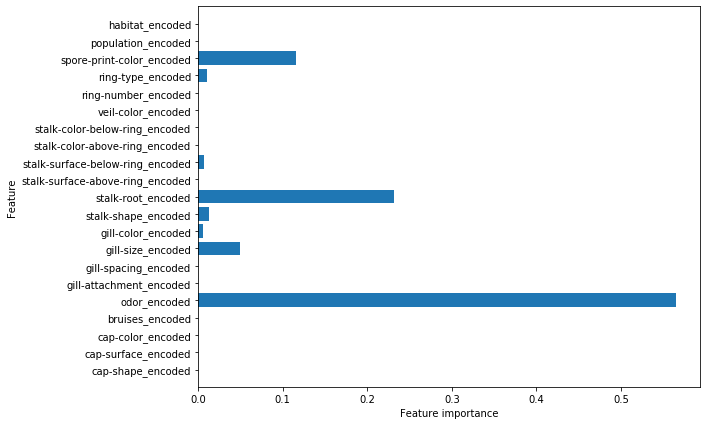

In [55]:
%matplotlib inline

#Finding most important features.

def plot_feature_importances_cancer(model):
    fig, ax = plt.subplots(figsize=(9, 7))
    n_features = X_train_freq_enc.shape[1]
    plt.barh(range(n_features), grid.best_estimator_.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), X_train_freq_enc.columns)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)

plot_feature_importances_cancer(grid.best_estimator_)

From the above feature importance graph we observe that odor, stalk-root, spore-print-color, gill-size are the most importnat features in this order.

Accuracy: 0.847
F1 Score: 0.861

Confusion Matrix: 


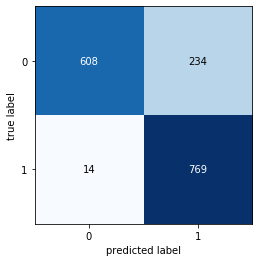

In [56]:
from sklearn.metrics import recall_score, f1_score, accuracy_score
from mlxtend.plotting import plot_confusion_matrix

pred = grid.predict(X_test_freq_enc)

print("Accuracy: {:.3f}".format(accuracy_score(y_test, pred)))
print("F1 Score: {:.3f}".format(f1_score(y_test, pred)))
print("\nConfusion Matrix: ")

fig, ax = plot_confusion_matrix(conf_mat=confusion_matrix(y_test, pred))
plt.show()

In [57]:
from sklearn.metrics import classification_report

print(classification_report(y_test, pred , target_names=["edible", "poisonous"]))

              precision    recall  f1-score   support

      edible       0.98      0.72      0.83       842
   poisonous       0.77      0.98      0.86       783

    accuracy                           0.85      1625
   macro avg       0.87      0.85      0.85      1625
weighted avg       0.88      0.85      0.85      1625



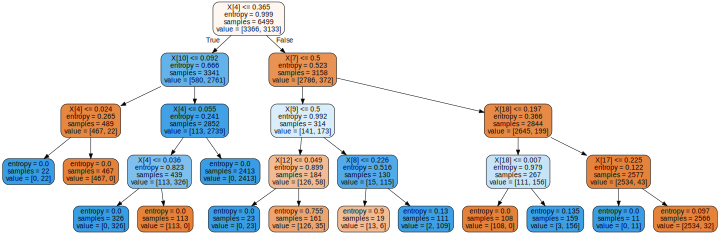

In [58]:
#Visualizing Decision Tree

import os 
import graphviz
import pydotplus

os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'

# Create DOT data
from sklearn.tree import export_graphviz

dot_data = export_graphviz(grid.best_estimator_, out_file=None, filled=True, rounded=True) 

pydot_graph = pydotplus.graph_from_dot_data(dot_data)
pydot_graph.write_png('original_tree.png')
pydot_graph.set_size('"10,10!"')

# Draw graph
graph = graphviz.Source(pydot_graph.to_string())

# Show graph
graph 

Decision Tree is not producing better results. The reason might be because decision trees work better less number of features. So, let's try to fit the decision tree with frequency encoding features since it has lesser number of features than one-hot encoding.

##### Using One Hot Encoded Data

In [59]:
param_grid = {'criterion':['gini','entropy'],'max_depth': np.arange(3, 5)}

In [60]:
from sklearn.tree import DecisionTreeClassifier

grid = GridSearchCV(DecisionTreeClassifier(), param_grid, refit = True, scoring = "f1")
grid.fit(X_train_one_enc,y_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([3, 4])},
             scoring='f1')

In [61]:
print("Best parameters: {}".format(grid.best_params_))
print("Best cross-validation score: {:.2f}".format(grid.best_score_))

Best parameters: {'criterion': 'entropy', 'max_depth': 4}
Best cross-validation score: 0.97


Accuracy: 0.985
F1 Score: 0.985

Confusion Matrix: 


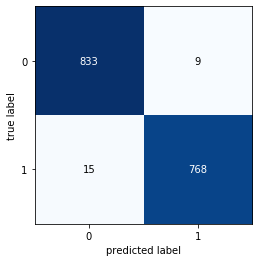

In [62]:
from sklearn.metrics import recall_score, f1_score, accuracy_score
from mlxtend.plotting import plot_confusion_matrix

pred = grid.predict(X_test_one_enc)

print("Accuracy: {:.3f}".format(accuracy_score(y_test, pred)))
print("F1 Score: {:.3f}".format(f1_score(y_test, pred)))
print("\nConfusion Matrix: ")

fig, ax = plot_confusion_matrix(conf_mat=confusion_matrix(y_test, pred))
plt.show()

In [63]:
from sklearn.metrics import classification_report

print(classification_report(y_test, pred , target_names=["edible", "poisonous"]))

              precision    recall  f1-score   support

      edible       0.98      0.99      0.99       842
   poisonous       0.99      0.98      0.98       783

    accuracy                           0.99      1625
   macro avg       0.99      0.99      0.99      1625
weighted avg       0.99      0.99      0.99      1625



Frequency Encoding has increased the performance of Decision Trees Marginally. Let's try KNN Model as well.

### KNN Classifier

##### Using Frequency Encoded Data

In [64]:
param_grid = {'n_neighbors':list(range(2,10,2)), 'weights': ['distance', 'uniform']}

In [65]:
from sklearn.neighbors import KNeighborsClassifier

grid = GridSearchCV(KNeighborsClassifier(), param_grid, refit = True, scoring = "f1")
grid.fit(X_train_freq_enc,y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [2, 4, 6, 8],
                         'weights': ['distance', 'uniform']},
             scoring='f1')

In [66]:
print("Best parameters: {}".format(grid.best_params_))
print("Best cross-validation score: {:.2f}".format(grid.best_score_))

Best parameters: {'n_neighbors': 6, 'weights': 'distance'}
Best cross-validation score: 0.99


Accuracy: 0.990
F1 Score: 0.990

Confusion Matrix: 


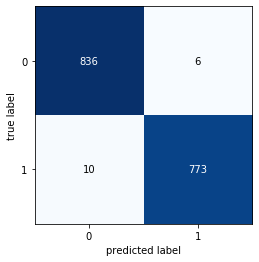

In [67]:
from sklearn.metrics import recall_score, f1_score, accuracy_score
from mlxtend.plotting import plot_confusion_matrix

pred = grid.predict(X_test_freq_enc)

print("Accuracy: {:.3f}".format(accuracy_score(y_test, pred)))
print("F1 Score: {:.3f}".format(f1_score(y_test, pred)))
print("\nConfusion Matrix: ")

fig, ax = plot_confusion_matrix(conf_mat=confusion_matrix(y_test, pred))
plt.show()

In [68]:
from sklearn.metrics import classification_report

print(classification_report(y_test, pred , target_names=["edible", "poisonous"]))

              precision    recall  f1-score   support

      edible       0.99      0.99      0.99       842
   poisonous       0.99      0.99      0.99       783

    accuracy                           0.99      1625
   macro avg       0.99      0.99      0.99      1625
weighted avg       0.99      0.99      0.99      1625



In [69]:
print(np.where(X.columns == 'odor'))
print(np.where(X.columns == 'stalk-root'))

# most important parameters

(array([4], dtype=int64),)
(array([10], dtype=int64),)


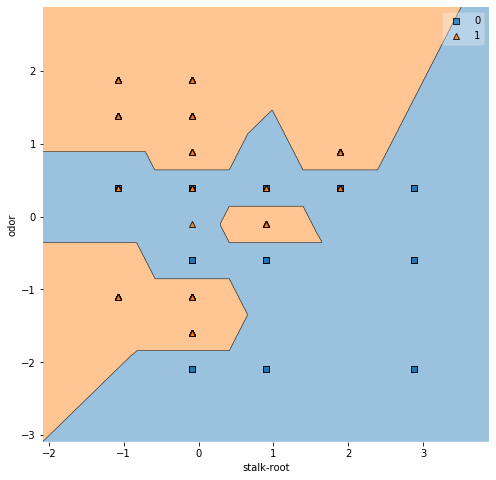

In [70]:
%matplotlib inline

from mlxtend.plotting import plot_decision_regions

fig = plt.figure(figsize=(8, 8))
plt.xlim(-0.5, 1.5)
plt.ylim(-0.5, 1.5)
X_b = X_train_scaled[:4000, [10, 4]]
y_b = np.array(y_train)[:4000]

knn = KNeighborsClassifier(6)
knn.fit(X_b, y_b) 

plot_decision_regions(X_b, y_b, clf = knn)
plt.xlabel('stalk-root')
plt.ylabel('odor')
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, ["Edible", "Poisonous"])

##### Using One Hot Encoded Data

In [71]:
from sklearn.neighbors import KNeighborsClassifier

grid = GridSearchCV(KNeighborsClassifier(), param_grid, refit = True, scoring = "f1")
grid.fit(X_train_one_enc,y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [2, 4, 6, 8],
                         'weights': ['distance', 'uniform']},
             scoring='f1')

In [72]:
print("Best parameters: {}".format(grid.best_params_))
print("Best cross-validation score: {:.2f}".format(grid.best_score_))

Best parameters: {'n_neighbors': 6, 'weights': 'distance'}
Best cross-validation score: 1.00


Accuracy: 0.999
F1 Score: 0.999

Confusion Matrix: 


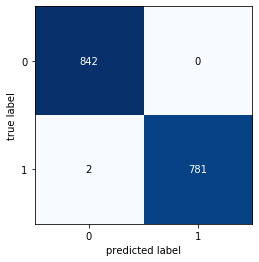

In [73]:
from sklearn.metrics import recall_score, f1_score, accuracy_score
from mlxtend.plotting import plot_confusion_matrix

pred = grid.predict(X_test_one_enc)

print("Accuracy: {:.3f}".format(accuracy_score(y_test, pred)))
print("F1 Score: {:.3f}".format(f1_score(y_test, pred)))
print("\nConfusion Matrix: ")

fig, ax = plot_confusion_matrix(conf_mat=confusion_matrix(y_test, pred))
plt.show()

In [74]:
from sklearn.metrics import classification_report

print(classification_report(y_test, pred , target_names=["edible", "poisonous"]))

              precision    recall  f1-score   support

      edible       1.00      1.00      1.00       842
   poisonous       1.00      1.00      1.00       783

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



### Linear SVC 

In [75]:
clf = LinearSVC()
clf.fit(X_train_freq_enc,y_train)

LinearSVC()

Accuracy: 0.947
F1 Score: 0.946

Confusion Matrix: 


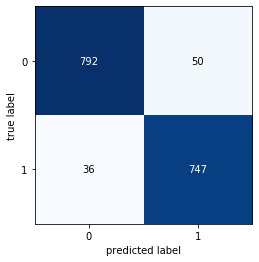

In [76]:
from sklearn.metrics import recall_score, f1_score, accuracy_score
from mlxtend.plotting import plot_confusion_matrix

pred = clf.predict(X_test_freq_enc)

print("Accuracy: {:.3f}".format(accuracy_score(y_test, pred)))
print("F1 Score: {:.3f}".format(f1_score(y_test, pred)))
print("\nConfusion Matrix: ")

fig, ax = plot_confusion_matrix(conf_mat=confusion_matrix(y_test, pred))
plt.show()

In [77]:
from sklearn.metrics import classification_report

print(classification_report(y_test, pred , target_names=["edible", "poisonous"]))

              precision    recall  f1-score   support

      edible       0.96      0.94      0.95       842
   poisonous       0.94      0.95      0.95       783

    accuracy                           0.95      1625
   macro avg       0.95      0.95      0.95      1625
weighted avg       0.95      0.95      0.95      1625



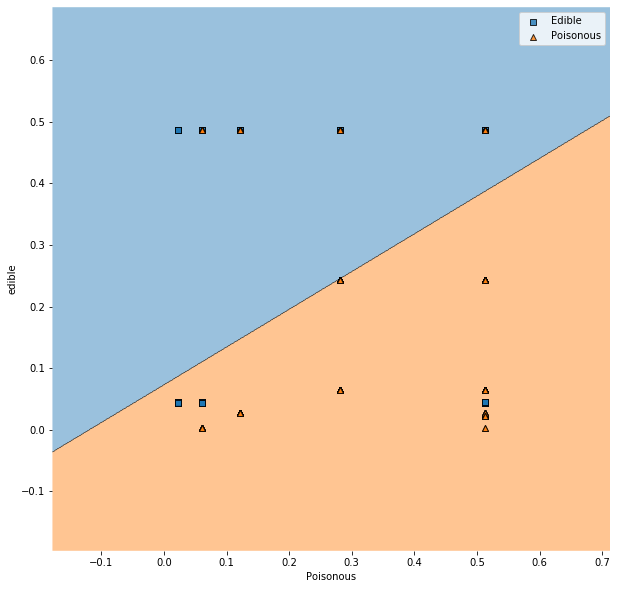

In [78]:
X_b = np.array(X_train_freq_enc)[:,[10,4]]
y_b = y_train[:]

clf = LinearSVC()
clf.fit(X_b,y_b)

fig, ax = plt.subplots(figsize = (10,10))
plot_decision_regions(np.array(X_b), np.array(y_b), clf, zoom_factor=5)
plt.xlabel("Poisonous")
plt.ylabel("edible")
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, ["Edible", "Poisonous"])

### SVC with kernel trick vs linear SVC for Frequency Encoded Data

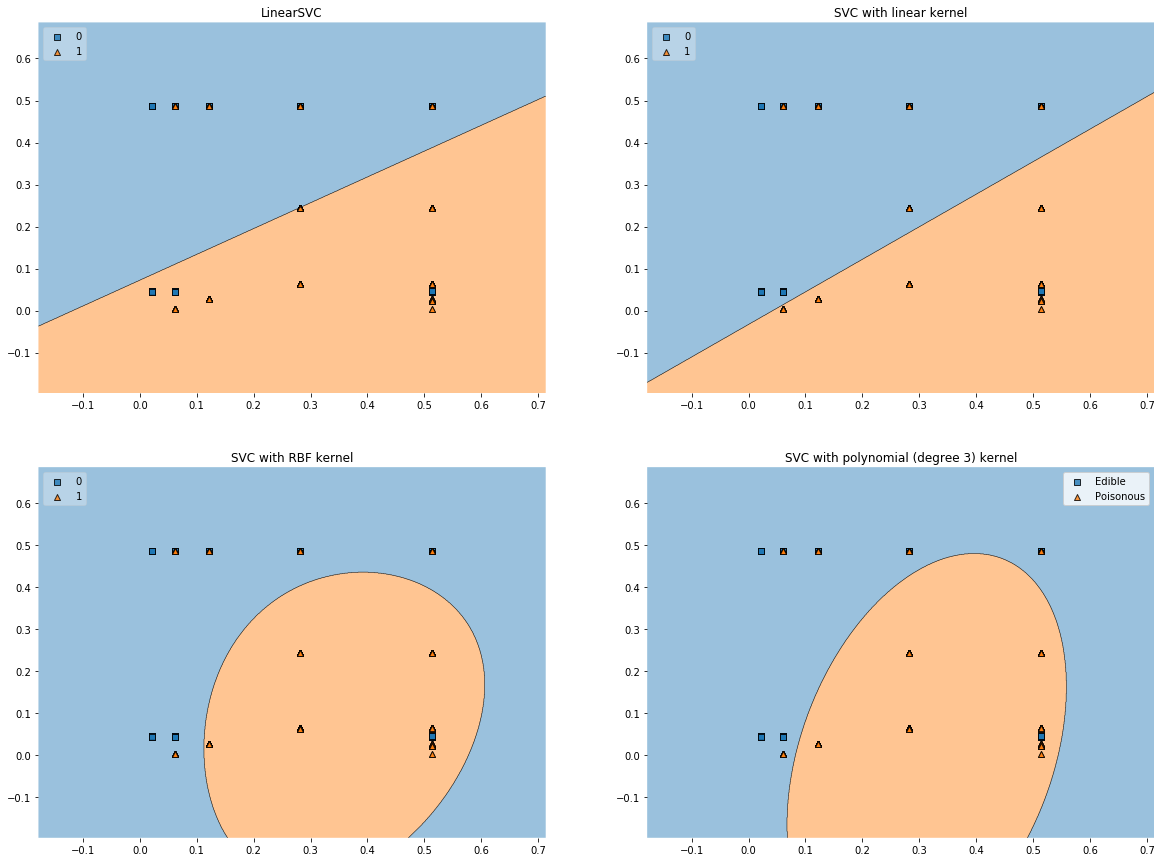

In [79]:
%matplotlib inline

from mlxtend.plotting import plot_decision_regions
from sklearn.svm import SVC, LinearSVC
import matplotlib.gridspec as gridspec
import itertools

X_b = np.array(X_train_freq_enc)[:,[10,4]] # Taking Odor and stalk-root as they are the important variables
y_b = y_train[:]

C = 10
clf1 = LinearSVC(C=C)
clf2 = SVC(kernel='linear', C=C)
clf3 = SVC(kernel='rbf', gamma=0.7, C=C)
clf4 = SVC(kernel='poly', degree=2, C=C, coef0=1)

gs = gridspec.GridSpec(2, 2)
fig, ax = plt.subplots(figsize=(20, 15))

labels = ['LinearSVC',
          'SVC with linear kernel',
          'SVC with RBF kernel',
          'SVC with polynomial (degree 3) kernel']

for clf, lab, grd in zip([clf1, clf2, clf3, clf4],
                         labels,
                         itertools.product([0, 1],
                         repeat=2)):
    clf.fit(X_b, y_b)
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X_b, np.array(y_b),
                                clf=clf, legend=2, 
                                zoom_factor=5)
    plt.title(lab)
    handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, ["Edible", "Poisonous"])
    


The grid showing different SVC models with and without the kernel trick

## Summary

Let's now summarize our findings from evaluating all the models on the basis of f1 score. Using pretty table to display the metrics in a table format.

In [80]:
#pip install prettytable

In [81]:
from prettytable import PrettyTable
x = PrettyTable()

x.field_names = ["Model", "F1 Score"]

x.add_row(["Logistic Regression using frequency encoded data", 0.957])
x.add_row(["Logistic Regression using One hot encoded data", 0.996])
x.add_row(["SVM with frequency encoded data", 0.996])
x.add_row(["SVM with One hot encoded data", 1.00])
x.add_row(["Decision Trees with frequency encoded data", 0.981])
x.add_row(["Decision Trees with One hot encoded data", 0.962])
x.add_row(["KNN Classifier with Frequency encoded data", 0.995])
x.add_row(["KNN Classifier with One hot encoded data", 1.00])
x.add_row(["Linear SVC", 0.953])
print(x)

+--------------------------------------------------+----------+
|                      Model                       | F1 Score |
+--------------------------------------------------+----------+
| Logistic Regression using frequency encoded data |  0.957   |
|  Logistic Regression using One hot encoded data  |  0.996   |
|         SVM with frequency encoded data          |  0.996   |
|          SVM with One hot encoded data           |   1.0    |
|    Decision Trees with frequency encoded data    |  0.981   |
|     Decision Trees with One hot encoded data     |  0.962   |
|    KNN Classifier with Frequency encoded data    |  0.995   |
|     KNN Classifier with One hot encoded data     |   1.0    |
|                    Linear SVC                    |  0.953   |
+--------------------------------------------------+----------+


## Conclusion
### Hence, we conclude that mostly all the models are performing pretty well, but One Hot encoded data performed better than frequency encoded data 
### One Hot Encoded worked the best in case of KNN and SVM as compared to frequency encoding. 
### Apart from decsision trees all the other models gave better results with one hot encoded data.
### Linear SVC has lowest score as compared to all the oher models.